# Week 02 Assignment: Fitting and Plotting
Author: Jiani Long

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib notebook

## Inputs:

In [3]:
import numpy as np
x = np.array([ 1.,   1.5,  2.,   2.5,  3.,   3.5,  4.,   4.5,  5.,   5.5,  6.,   6.5,  7.,   7.5, 8.,   8.5,  9.,   9.5, 10. ])
y = np.array([3.43, 4.94, 6.45, 9.22, 6.32, 6.11, 4.63, 8.95, 7.8, 8.35, 11.45, 14.71, 11.97, 12.46, 17.42, 17.0, 15.45, 19.15, 20.86])

## Procedure:
#### 1.Fit a linear curve to the data

<IPython.core.display.Javascript object>


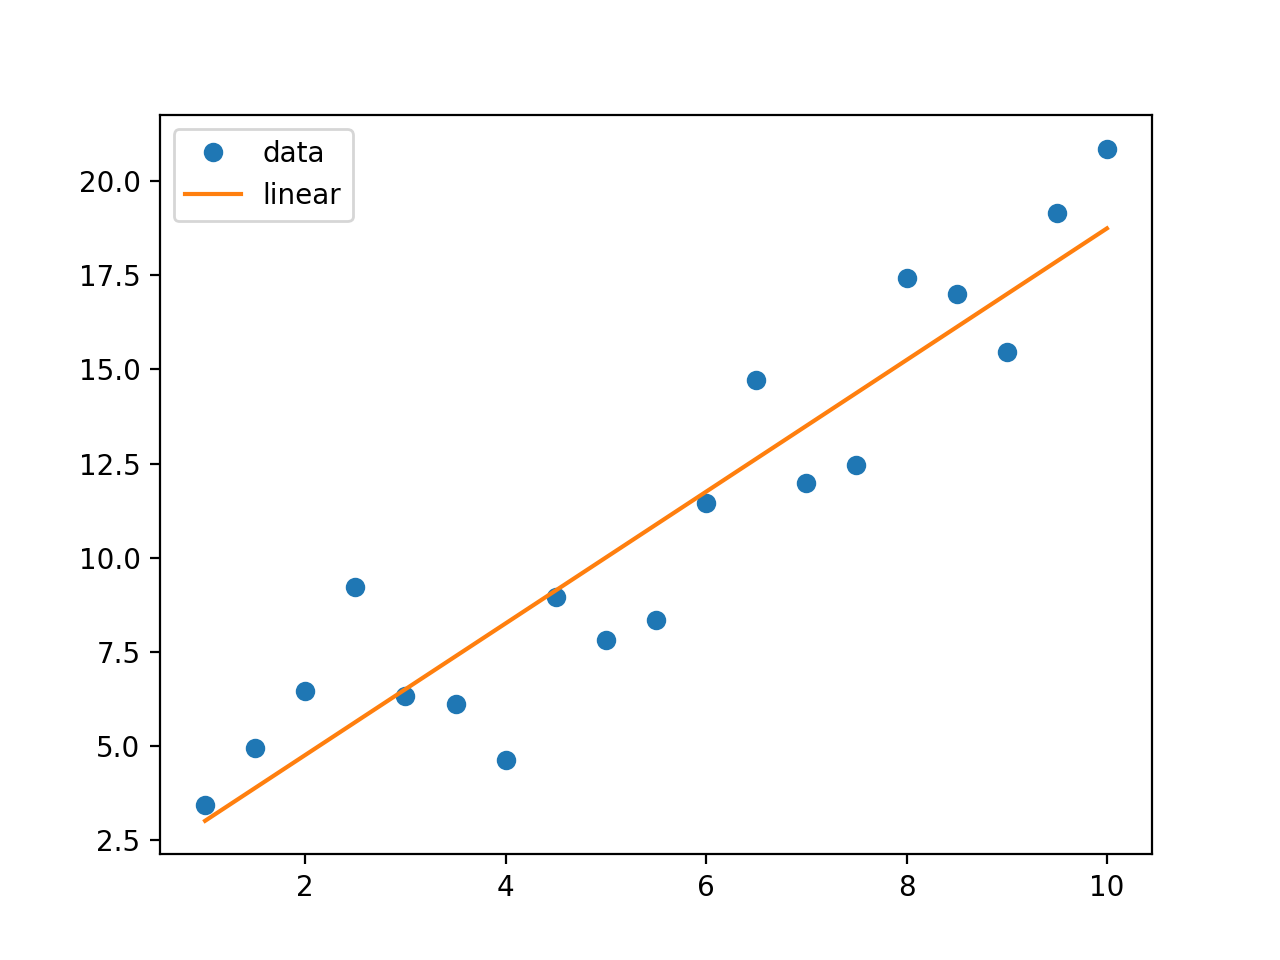

In [64]:
import matplotlib
import matplotlib.pyplot as plt
lc = np.polyfit(x, y, 1)
ln_f = np.poly1d(lc)
x_new = np.linspace(x[0], x[-1], 50)
y_new = ln_f(x_new)
plt.plot(x,y,'o', x_new, y_new)
plt.legend(['data', 'linear'], loc='best')
plt.show()

#### 2. Fit a cubic curve using the SciPy library 

<IPython.core.display.Javascript object>


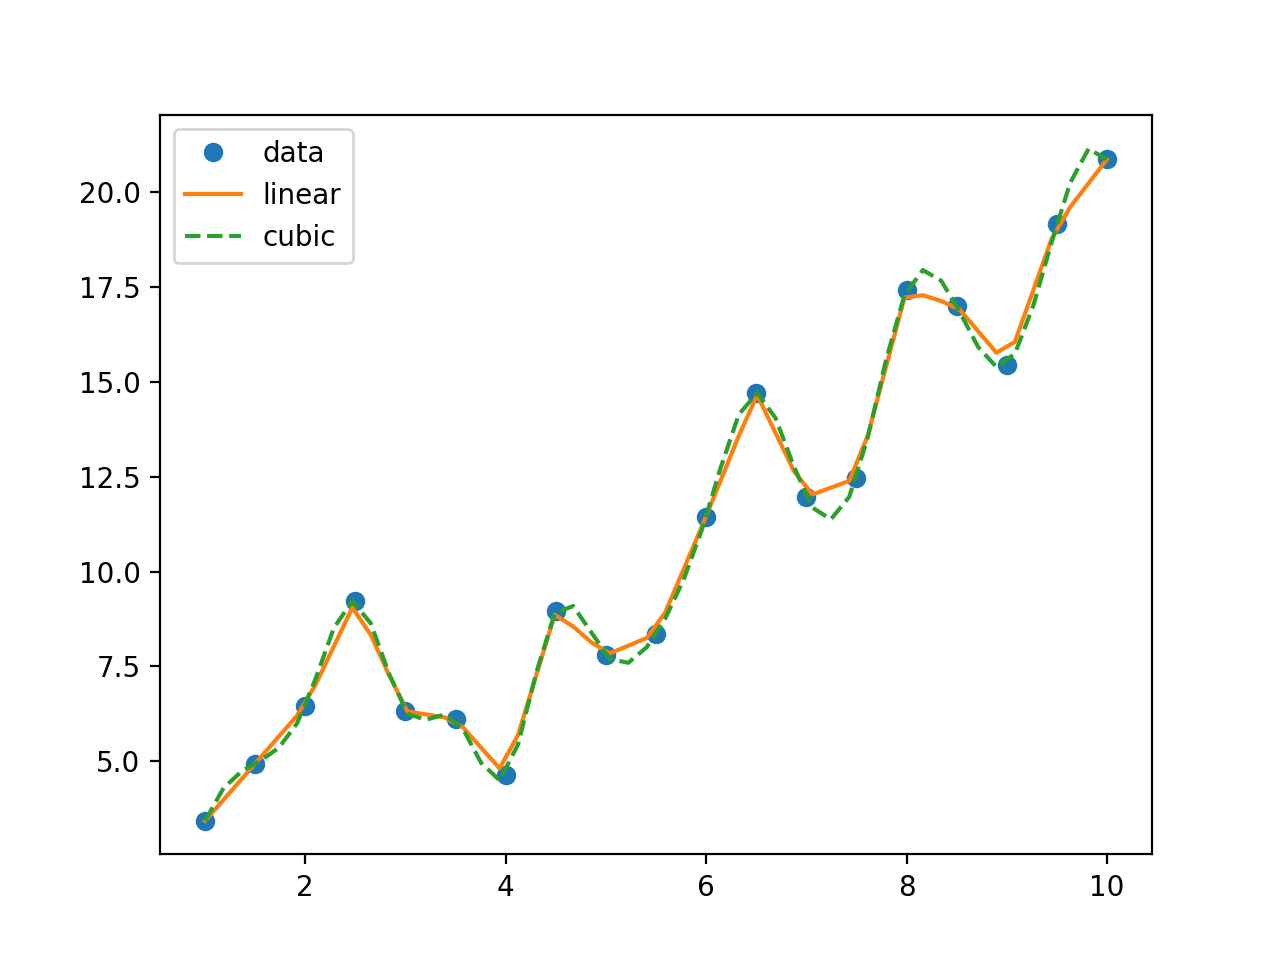

In [79]:
import scipy as sp
from scipy.interpolate import interp1d
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
x_new2 = np.linspace(x[0], x[-1], 50)
plt.plot(x, y, 'o', x_new2, f(x_new2), '-', x_new2, f2(x_new2), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

#### 3. Find the area underneath the cubic curve over the domain of the data using the tools in SciPy

In [39]:
import scipy.integrate as integrate
area = integrate.quad(lambda x: f2(x), np.min(x), np.max(x))
print('Area under cubic curve = ', area[0])

Area under cubic curve =  97.5124303522046


#### 4. Plot the data, the linear fit, and the cubic fit in Matplotlib.  Make sure to give the plot a title and an x and y label. Save this figure and include it in your pull request!

#### 5. Put the area of the curve on the plot somewhere as text using Matplotlib

<IPython.core.display.Javascript object>


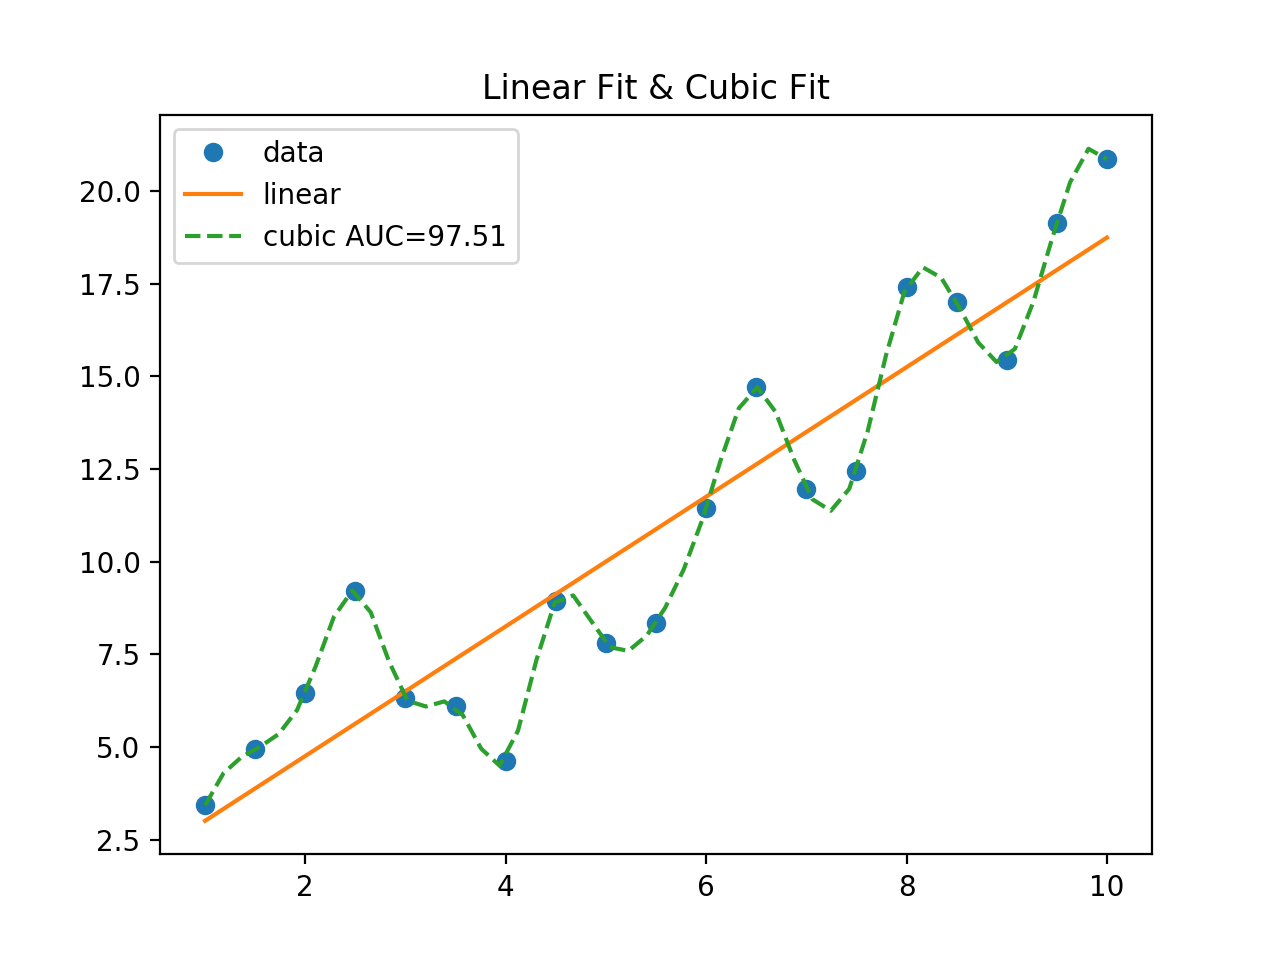

Text(0.5,1,'Linear Fit & Cubic Fit')

In [58]:
plt.plot(x, y, 'o', x_new, y_new, '-', x_new2, f2(x_new2), '--')
plt.legend(['data', 'linear', 'cubic AUC={0:.2f}'.format(area[0])], loc='best')
plt.title("Linear Fit & Cubic Fit")
plt.show()

#### 6. Use the Bayesian information criterion to justify which model (linear or cubic) is preferable.  Include this justification in your journal entry for the week.

In [101]:
def BIC(y, yhat, k, weight = 1):
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + weight*k*np.log(n)
    return B

lcBIC = BIC(y,ln_f(x),2)
cbBIC = BIC(y,f2(x),4)
print('BIC of linear model={0:.4f}; BIC of Cubic model={1:.4f}'.format(lcBIC, cbBIC))

BIC of linear model=29.9795; BIC of Cubic model=-1297.2021


   Not sure why I got a negative value....